# Exercise 4.10 Task Part 1

## Contents
1. Importing libaries and combined dataframe
    - inspected imported data
2. Consider security implications of new data (customer dataset); address PII before continuing analysis
3. Created regional segmentation of the data, according to US Census Bureau 
    - Northeast, Midwest, South, West
    - Determining whether there's a difference in spending habits between the different US regions
4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
    - changed name from ords_prods_all to ords_prods_active (and later to df)
5. Created a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
    - generation includes silent generation, baby boomers, gen x, millennials, and gen z
    - Customer Profile includes DivWid, Young Parent, Nightowl, Drizly, and Whale
6. Created visualizations based on these profiles
    - customer breakdown for generations
    -LTV breakdwon for customer profile
7. Aggregated the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
8. Compared customer profiles with regions and departments.
    - created sub-df's and made various bar graphs to demonstrate spending habits



### Import Librarires

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# imported mode to accomodate for 'nightowl' customer profile

### Import Orders_products_all from Exercise 4.9.2 as ords_prods_all

In [2]:
# Setting path to Achievement 4 master folder
path = r'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'
#checking path set correctly
path

'/Users/jeremyobach/Documents/Data Analytics/CareerFoundry/Achievement 4- Python for DA/DEC23 Instacart Basket Analysis - MASTER FOLDER'

In [3]:
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
ords_prods_all.shape

(32404859, 27)

In [5]:
# delimiting columns displayed
pd.options.display.max_columns = None

In [6]:
ords_prods_all.head(30)

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Most orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Most orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Busiest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid range product,Busiest days,Most orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid range product,Busiest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Consider security implications of new data (customer dataset); address PII before continuing analysis.

- chose to drop firstname & surname columns in 4.9
- Other PII elements (address, email, phone number) not a factor in this case

## 3. Create a regional segmentation of the data. 
The Instacart officers are interested in comparing customer behavior in different geographic areas. 
- You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)



Creating region column a 3 step process; 
1) split the data based on some criteria - in this case, state Region.
2) Apply function to each group seperately (may not apply here)
3) Create new column in current df

In [7]:
# Step 1

states = ords_prods_all.groupby('STATE')

#### User defined function - didn't end up working, marking down -> User defined function method resulting in N/A results, going to try loc() function

#def region(row):
   if row['STATE'] in [['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']]:
        return 'Northeast'
    elif row['STATE'] in [['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']]:
        return 'Midwest'
    elif row['STATE'] in [['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']]:
        return 'South'
    elif row['STATE'] in [['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii', 'Idaho', 'Montana', 'Wyoming','Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']]:
        return 'West'
    else:
        return 'N/A'
    

ords_prods_all ['Region'] = ords_prods_all.apply(region, axis=1)

#### Also possibly not necessary but - broke the states into sub-df's, kind of while I was figuring out how to use loc function to populate a new column

In [8]:
ords_prods_northeast = ords_prods_all.loc[ords_prods_all['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'])]

In [9]:
ords_prods_midwest = ords_prods_all.loc[ords_prods_all['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'])]

In [10]:
ords_prods_south = ords_prods_all.loc[ords_prods_all['STATE'].isin(['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'])]

In [11]:
ords_prods_west = ords_prods_all.loc[ords_prods_all['STATE'].isin(['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii', 'Idaho', 'Montana', 'Wyoming','Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico'])]

We've created subset dataframes of each of the regions, which could be helpful for later. But our task was to create a column from the main dataframe. Let's try it again with .isin()

In [12]:
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/3087169341.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Northeast' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_all.loc[ords_prods_all['STATE'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'Region'] = 'Northeast'


In [13]:
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'Region'] = 'Midwest'

In [14]:
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Delaware','Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'Region'] = 'South'

In [15]:
ords_prods_all.loc[ords_prods_all['STATE'].isin(['Alaska', 'Washington', 'Oregon', 'California', 'Hawaii', 'Idaho', 'Montana', 'Wyoming','Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico']), 'Region'] = 'West'

In [16]:
ords_prods_all.tail()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Regularly busy,Average orders,New customer,Low spender,NaN,Male,Washington,52,3/31/2018,2,married,116193,West
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,"Zucchini Chips, Pesto",50,19,6.9,Mid range product,Slowest days,Fewest orders,New customer,Low spender,Regular_customer,Male,Washington,52,3/31/2018,2,married,116193,West
32404858,3093936,205420,1,4,14,NaN,True,28818,8,0,Hot Oatmeal Multigrain Raisin,130,14,10.3,Mid range product,Slowest days,Most orders,Regular customer,Low spender,NaN,Male,Tennessee,71,11/12/2019,1,married,142822,South


### Determining whether there's a difference in spending habits between the different US regions

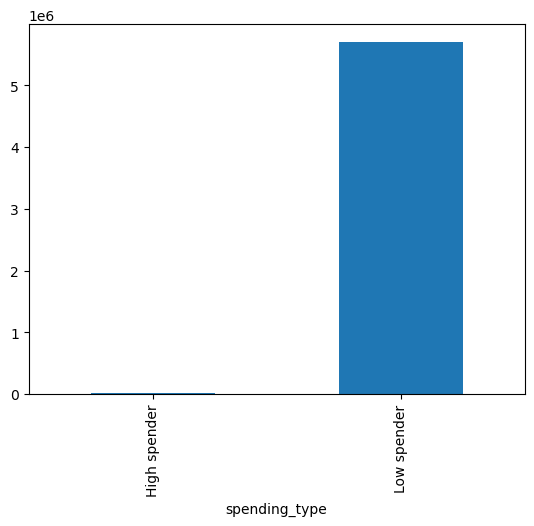

In [17]:
northeast_spending = ords_prods_northeast['spending_type'].value_counts().sort_index().plot.bar()

My initial idea was to create a bar chart with each of the regions, like above, but the proportions are so skewed toward low spenders that there isn't much value from this bar chart.

My next idea was to check value_count() between high and low spenders for each region. These are the two 

In [18]:
ords_prods_all['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [19]:
ords_prods_northeast['spending_type'].value_counts()

spending_type
Low spender     5704094
High spender      18642
Name: count, dtype: int64

In [20]:
ords_prods_midwest['spending_type'].value_counts()

spending_type
Low spender     7568060
High spender      29265
Name: count, dtype: int64

In [21]:
ords_prods_south['spending_type'].value_counts()

spending_type
Low spender     10751306
High spender       40579
Name: count, dtype: int64

In [22]:
ords_prods_west['spending_type'].value_counts()

spending_type
Low spender     8261671
High spender      31242
Name: count, dtype: int64

There's probably a more elegant way to demonstrate this data, going to think it over. One way that doesn't necessarily use the 'spending_type' flag would be loyalty flag or LTV (lifetime value) per 'user_id' by region.

## 4.  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
- The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.
- Make sure you export this sample.

In [23]:
# Recreating 'max_order' since I removed it in a previous script

ords_prods_all['max_order'] = ords_prods_all.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/610743407.py:3: FutureWarning: The provided callable <function amax at 0x108ad8ae0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_all['max_order'] = ords_prods_all.groupby(['user_id'])['order_number'].transform(np.max)


Creating 'low_activity' flag to identify users with >= 5 orders

In [24]:
ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'low_activity'] = 'N'

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/1452484590.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'N' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_all.loc[ords_prods_all['max_order'] >= 5, 'low_activity'] = 'N'


In [25]:
ords_prods_all.loc[ords_prods_all['max_order'] < 5, 'low_activity'] = 'Y'

In [26]:
ords_prods_all['low_activity'].value_counts(dropna = False)

low_activity
N    30964564
Y     1440295
Name: count, dtype: int64

In [27]:
# Creating ords_prods_active, a subset of ords_prods_all with only user_id's with 5 or more orders

ords_prods_active = ords_prods_all[ords_prods_all['low_activity'] == 'N']

In [28]:
# Exporting this sample/subset as ords_prods_active

ords_prods_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_active.pkl'))

## 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 

- You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. - (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Directions are to include
1) Age
2) Income
3) Category of Goods
4) Number of Dependents

Brainstorming here: 
- DINKS (dual income, no kids) - 0 dependants, married, income above 100K 
- Nightowls - ordering in the evening, presumably more alchohol ('department_id' == 5) and snack purchases ('department_id' = 19)
- Gen X (43-58 yrs old), Baby Boomers (59-77 yrs old), Millennials (27-42 yrs old), Gen Z (11-26 yrs old) 
- "Life Together": +1.5 dependents, +100K income, married.
- Else: normies

These might not be mutually exclusive though. Generations will be, but DINKS/Nightowls/Life Together will not. 
Will make ['generation'] variable and then experiment with a more niche/ customer profile variable that can be a little more nuanced, take some different variables into account.



In [29]:
ords_prods_active['Age'].astype('float64')

0           31.0
1           31.0
2           31.0
3           31.0
4           31.0
            ... 
32404852    48.0
32404853    48.0
32404854    48.0
32404855    48.0
32404858    71.0
Name: Age, Length: 30964564, dtype: float64

In [30]:
# Going to try For-loop method; loc() method appears to be incompatible with 'str' object

result = []

for value in ords_prods_active['Age']:
    if value > 77:
        result.append('Silent Generation')
    elif (value <= 77) & (value > 58):
        result.append('Baby Boomer')
    elif (value <= 58) & (value > 42):
        result.append('Gen X')
    elif (value <= 42) & (value > 26):
        result.append('Millennial')
    elif (value <= 26) & (value > 11):
        result.append('Gen Z')
    elif value <= 11:
        result.append('Gen A')
    else:
        result.append('N/A')

In [31]:
result

# Unclear why I'm getting all these N/As

['Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Millennial',
 'Millennial',
 'Millennial',
 'Millennial',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Gen X',
 'Gen X',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 'Baby Boomer',
 '

Update: fixed NA's by using parentheses around each of the conditions around "&"!!

In [32]:
ords_prods_active['generation'] = result

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/1717857312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_active['generation'] = result


In [33]:
ords_prods_active['generation'].value_counts(dropna = False)

# I don't understand how to catch these NA's. They should be getting routed to one of these generation buckets.

generation
Baby Boomer          9097166
Gen X                7824562
Millennial           7730373
Gen Z                4354410
Silent Generation    1958053
Name: count, dtype: int64

In [34]:
ords_prods_active.tail()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,max_order,low_activity,generation
32404852,2329472,202557,15,6,12,6.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest,31,N,Gen X
32404853,694731,202557,16,1,14,2.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Busiest days,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest,31,N,Gen X
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest,31,N,Gen X
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,Orange Energy Shots,64,7,3.7,Low range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Female,Minnesota,48,10/11/2017,2,married,36899,Midwest,31,N,Gen X
32404858,3093936,205420,1,4,14,NaN,True,28818,8,0,Hot Oatmeal Multigrain Raisin,130,14,10.3,Mid range product,Slowest days,Most orders,Regular customer,Low spender,NaN,Male,Tennessee,71,11/12/2019,1,married,142822,South,16,N,Baby Boomer


### 'generation' variable successful; profiling variable taking into account different feeder factors seems to be a bigger challenge.

- probably a user-defined function? but its a very large dataset still
- will try loc() function first


DINK - fam_status = married, n_dependants = 0
Night Owl - will need to transform 'order hour of the day' for mode, highest frequency during night hours say 9pm-4am
Young parent - Millenial or Gen Z with over >0 dependant
DivWid - fam_status = divorced/widowed 
Else: normies


In [35]:
# abbreviating to ords_prods_active to df, since we're going to type it a lot for this loc() function
df = ords_prods_active

In [73]:
df.shape

(30964564, 35)

In [74]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,orders_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_type,frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region,max_order,low_activity,generation,customer_profile,mean_order_hour,favorite_department,LTV
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,N,Millennial,Young Parent,10.542373,19,375.7
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,N,Millennial,Young Parent,10.542373,19,375.7
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Most orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,N,Millennial,Young Parent,10.542373,19,375.7
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Average orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,N,Millennial,Young Parent,10.542373,19,375.7
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid range product,Slowest days,Most orders,New customer,Low spender,Non-frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,South,10,N,Millennial,Young Parent,10.542373,19,375.7


In [36]:
# creating 'customer_profile' variable to include DINKS, Night Owls, Young Parent, Divorcee
df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] == 0), 'customer_profile'] = 'DINK'

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/253624589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] == 0), 'customer_profile'] = 'DINK'
/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/253624589.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'DINK' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] == 0), 'customer_profile'] = 'DINK'


In [37]:
df.loc[(df['Age'] < 35) & (df['n_dependants'] > 0), 'customer_profile'] = 'Young Parent'

In [38]:
df.loc[df['fam_status'] == 'divorced/widowed', 'customer_profile'] = 'DivWid'

In [39]:
# Was unable to figure out how to import mode within the transform then loc() structure, going to settle for mean

df['mean_order_hour'] = df.groupby(['user_id'])['orders_hour_of_day'].transform(np.mean)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/623362834.py:3: FutureWarning: The provided callable <function mean at 0x108ad9800> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df['mean_order_hour'] = df.groupby(['user_id'])['orders_hour_of_day'].transform(np.mean)
/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/623362834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_order_hour'] = df.groupby(['user_id'])['orders_hour_of_day'].transform(np.mean)


In [40]:
df.loc[df['mean_order_hour'].isin([19,20,21, 22, 23, 0, 1, 2, 3, 4, 5]), 'customer_profile'] = 'Nightowl'

In [41]:
df['customer_profile'].value_counts()

customer_profile
Young Parent    6178576
DivWid          2645210
Nightowl           1683
Name: count, dtype: int64

In [42]:
# to fulfill requirements, adding factors related to certain categories and incomes
# creating column for favorite department by user_id

df['favorite_department'] = df.groupby(['user_id'])['department_id'].transform(np.max)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/3548069216.py:4: FutureWarning: The provided callable <function amax at 0x108ad8ae0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['favorite_department'] = df.groupby(['user_id'])['department_id'].transform(np.max)
/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/3548069216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorite_department'] = df.groupby(['user_id'])['department_id'].transform(np.max)


In [43]:
df.loc[df['favorite_department'].isin([5,7]), 'customer_profile'] = 'Drizly'

To compare user_ids across orders, need to create a LTV (lifetime value) column. 

In [44]:
df['LTV'] = df.groupby(['user_id'])['prices'].transform(np.sum)

/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/2739680839.py:1: FutureWarning: The provided callable <function sum at 0x108ad8180> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df['LTV'] = df.groupby(['user_id'])['prices'].transform(np.sum)
/var/folders/12/fz0w81fd1mb1hklwgzyg3bx00000gn/T/ipykernel_53117/2739680839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LTV'] = df.groupby(['user_id'])['prices'].transform(np.sum)


In [45]:
df.loc[(df['income'] > 100000) & (df['LTV'] > 10000), 'customer_profile'] = 'Whale'

In [46]:
df['customer_profile'].value_counts()

customer_profile
Young Parent    6172849
DivWid          2578047
Whale            517559
Drizly            11866
Nightowl           1676
Name: count, dtype: int64

## 6. Create an appropriate vizualization to show the distribution of profiles

Will do one for generations and one for customer_profile

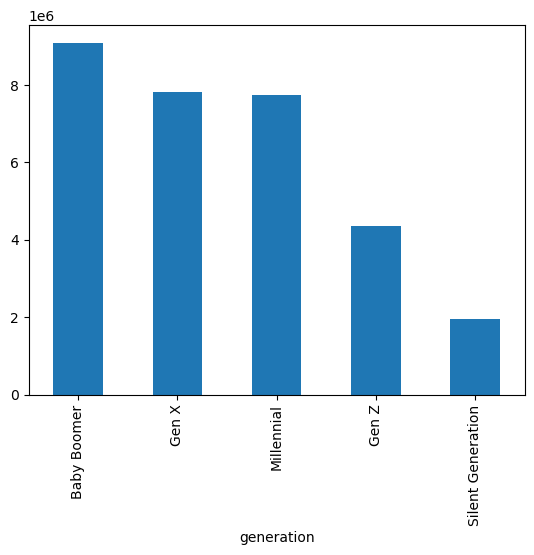

In [47]:
gen_bar = df['generation'].value_counts().plot.bar()

In [48]:
gen_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gen_bars.png'))

### Prevalence of baby boomers was surprising; thought their lack tech-savviness would see Millenials or X'ers in the highest proportion

/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jeremyobach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


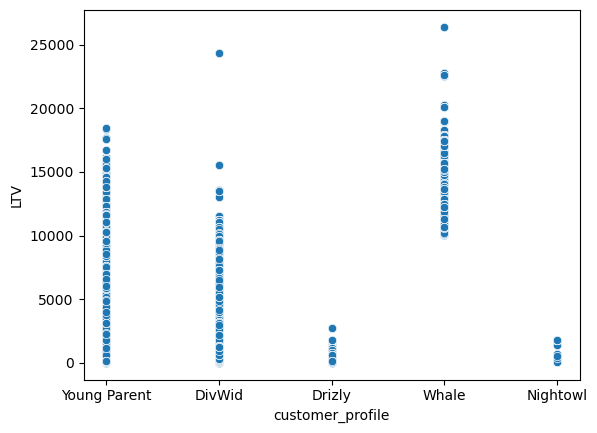

In [49]:
customer_profile_scatter = sns.scatterplot(x = 'customer_profile', y = 'LTV', data = df)

### Comparing LTV across the customer profiles created a lot of valuable insights. For one, broad categories like young parents and divorced/widows create a lot of value, whereas the LTV of more niche categories like Drizly (primarily alchohol purchases) showed limited LTV.

- begs the question, is it lack of interest or is this an opportunity for advertizing to create demand? 
    - also are there flaws in the criteria? Maybe counting ANY user_ID that has ordered alchohol would be more appropriate than only the lead category
- similar misgivings about definition of Whale (high spender/ high earner) and its lack of LTV (despite it being a small user_id count)
    - maybe definition tweak, to include high income but have some relation to LTV instead of average purchase. Will implement this change.

In [50]:
customer_profile_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_scatter.png'))

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [52]:
df.groupby('generation').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                        mean min max
generation                          
Baby Boomer        34.321365   5  99
Gen X              34.403313   5  99
Gen Z              34.480394   5  99
Millennial         34.510921   5  99
Silent Generation  34.541629   5  99

In [53]:
df.groupby('generation').agg({'LTV': ['mean', 'min', 'max']})

LTV               
                          mean   min      max
generation                                   
Baby Boomer        3411.315497   6.8  26394.9
Gen X              3400.744635   5.0  21509.2
Gen Z              3427.819401  10.5  18436.9
Millennial         3446.325156   7.0  22696.9
Silent Generation  3389.577509  12.0  18949.4

In [54]:
df.groupby('customer_profile').agg({'max_order': ['mean', 'min', 'max']})

max_order        
                       mean min max
customer_profile                   
DivWid            33.428451   5  99
Drizly            15.666189   5  74
Nightowl           8.487470   5  18
Whale             77.444031  27  99
Young Parent      34.434797   5  99

In [55]:
df.groupby('customer_profile').agg({'LTV': ['mean', 'min', 'max']})

LTV                  
                          mean      min      max
customer_profile                                
DivWid             3209.328733     15.7  24307.1
Drizly              422.712144      7.7   2723.2
Nightowl            685.443795     45.2   1815.7
Whale             12651.681932  10014.1  26394.9
Young Parent       3443.684750     11.4  18448.1

Not getting a very strong takeaway from these tbh

## 8. Compare your customer profiles with regions and departments.
- Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this imformation important.

Will make sub_df's with generations, customer profiles and crossreference by region and/or department.

In [56]:
df_boomer = df[df['generation']=='Baby Boomer']

In [57]:
df_x = df[df['generation']=='Gen X']

In [58]:
df_milly = df[df['generation']=='Millennial']

In [59]:
df_z = df[df['generation']=='Gen Z']

In [60]:
df_silent = df[df['generation']=='Silent Generation']

In [61]:
df_divwid = df[df['customer_profile']=='DivWid']

In [62]:
df_drizly = df[df['customer_profile']=='Drizly']

In [63]:
df_nightowl = df[df['customer_profile']=='Nightowl']

In [64]:
df_whale = df[df['customer_profile']=='Whale']

In [65]:
df_yp = df[df['customer_profile']=='Young Parent']

### Going to export the final df and its sub-dataframes into csv files and make visualizations with Tableau

- I hope my system can handle the size of these csv files

- df is ords_prods_active; which is orders_products_all minus accounts with less than 5 orders


In [66]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_active.csv'))

KeyboardInterrupt: 

In [ ]:
df_boomer.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_boomer.csv'))

In [ ]:
df_x.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_x.csv'))

In [ ]:
df_milly.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_millennials.csv'))

In [ ]:
df_z.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_z.csv'))

In [ ]:
df_silent.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_silent.csv'))

In [ ]:
df_divwid.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_divwid.csv'))

In [ ]:
df_drizly.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_drizly.csv'))

In [ ]:
df_nightowl.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_nightowl.csv'))

In [ ]:
df_whale.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_whale.csv'))

In [ ]:
df_yp.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Final Project Data', 'ords_prods_young_parent.csv'))

Attempting to make a scatterplot for different generations/customer profiles, using seaborn.

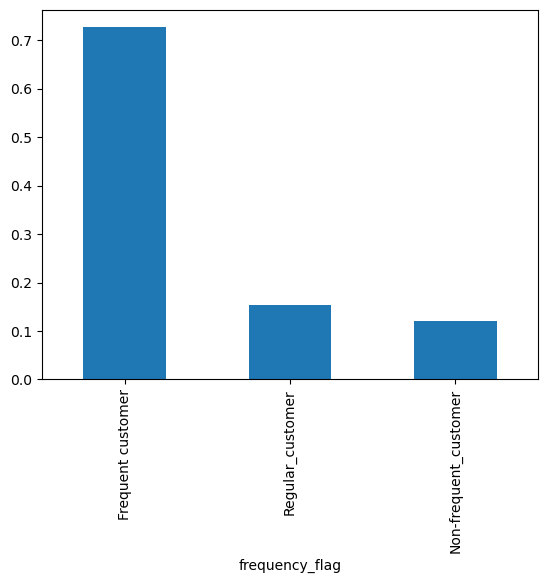

In [82]:
freq_northeast = ords_prods_northeast['frequency_flag'].value_counts(['user_id']).plot.bar()

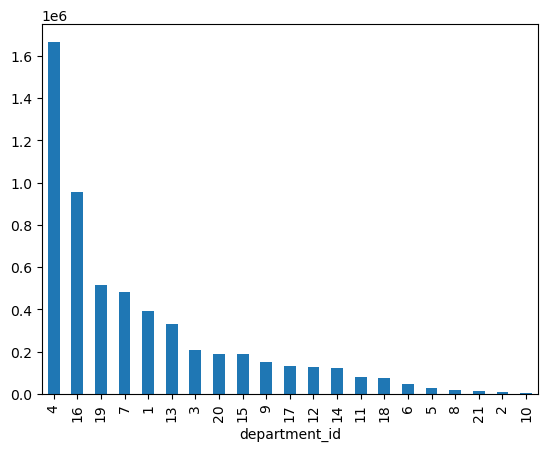

In [87]:
deparments_northeast = ords_prods_northeast['department_id'].value_counts().plot.bar()

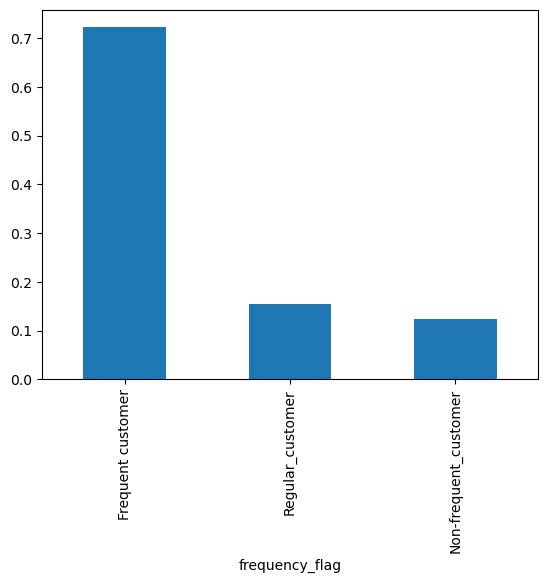

In [83]:
freq_midwest = ords_prods_midwest['frequency_flag'].value_count`s(['user_id']).plot.bar()

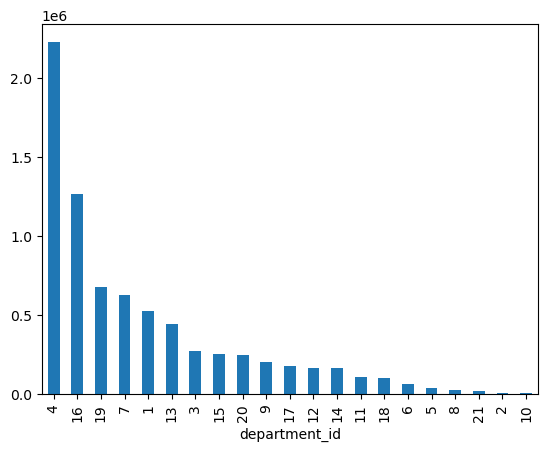

In [88]:
departments_midwest = ords_prods_midwest['department_id'].value_counts().plot.bar()

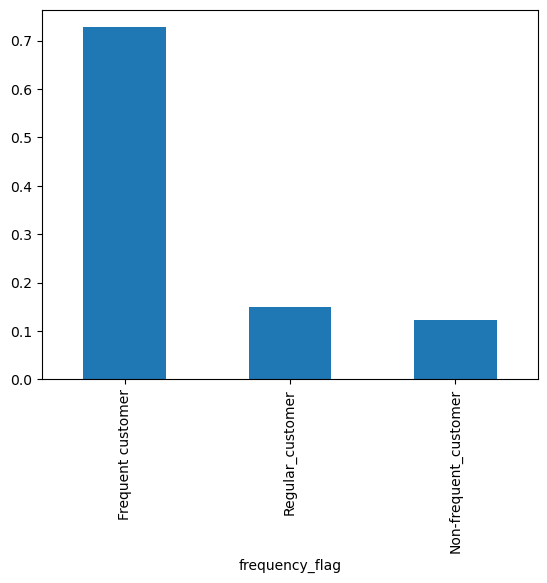

In [84]:
freq_south = ords_prods_south['frequency_flag'].value_counts(['user_id']).plot.bar()

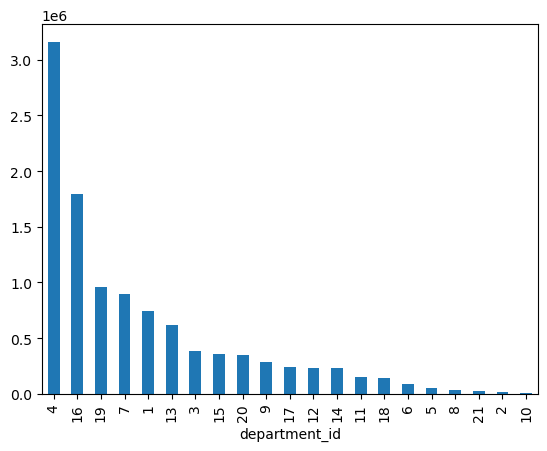

In [89]:
departments_south = ords_prods_south['department_id'].value_counts().plot.bar()

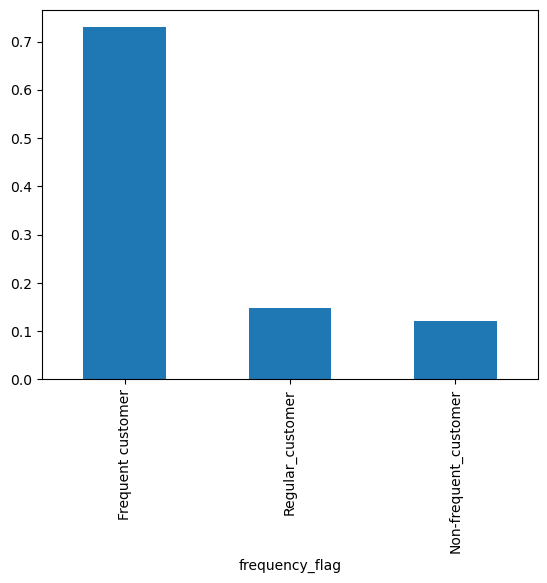

In [85]:
freq_west = ords_prods_west['frequency_flag'].value_counts(['user_id']).plot.bar()

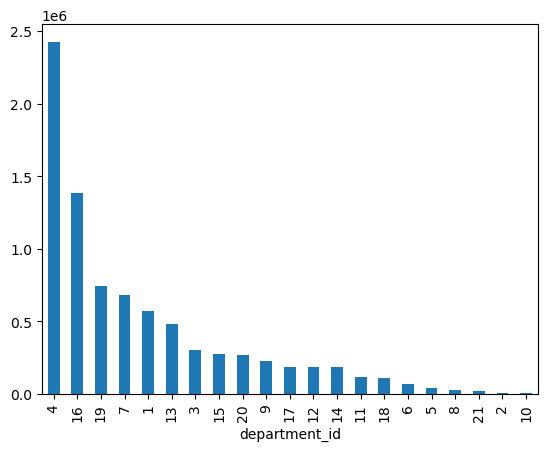

In [90]:
departments_west = ords_prods_west['department_id'].value_counts().plot.bar()

These charts are nearly identical; had to triple check that they're being fed different information. Not very valuable insight as far as regional differences.

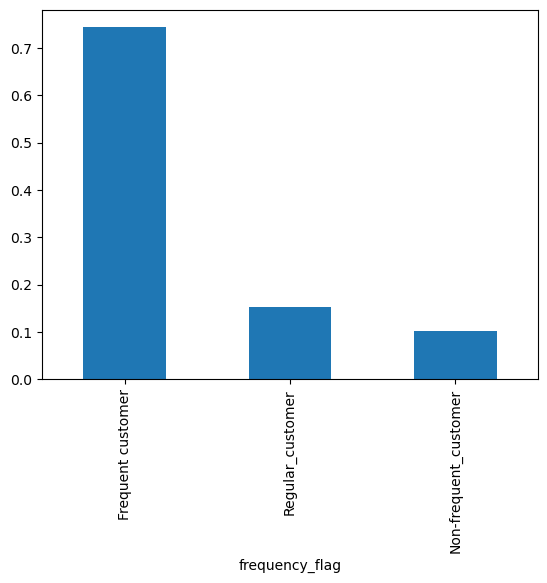

In [71]:
freq_divwid = df_divwid['frequency_flag'].value_counts(['order_id']).plot.bar()

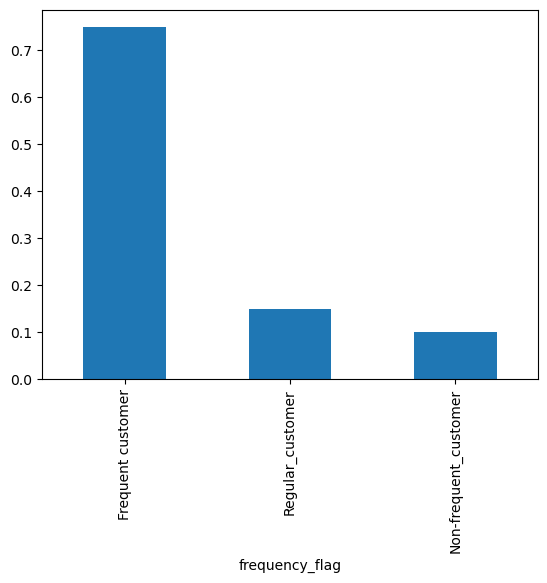

In [72]:
freq_yp = df_yp['frequency_flag'].value_counts(['order_id']).plot.bar()

Ultimately we need more detail for these to be exportable. They look like the same proportions to me.

### Python crosstab:

In [76]:
# Datacheck for missing values in days_since_prior order.
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

In [79]:
crosstab.to_clipboard()

### Price Groupings vizualization:

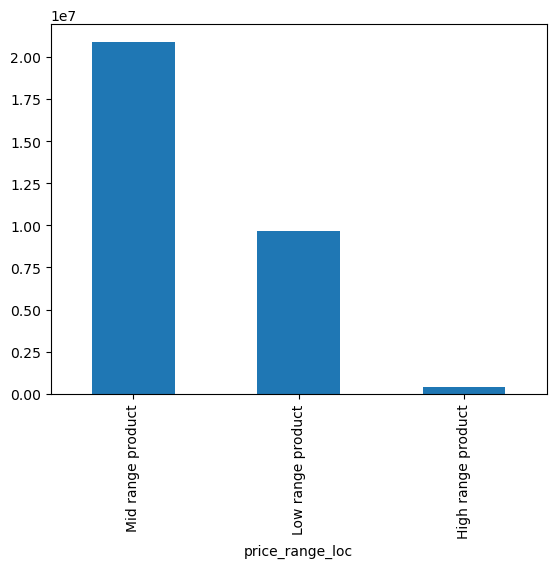

In [80]:
price_groupings = df['price_range_loc'].value_counts([]).plot.bar()